In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from pyclustree import clustree
import matplotlib.pyplot as plt

In [3]:
sc.set_figure_params(dpi=100)
pd.set_option('display.max_rows', 10)

In [5]:
adata = sc.read_h5ad('../PDAC_Final/Downstream/final_scanVI/final_object_all_genes.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 726054 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment', 'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category', 'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75', 'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75', 'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75', 'Adipocyte_leiden_0.75', 'End

In [11]:
adata.obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0  AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                              Unique_ID Technology  n_genes  \
Dataset_Barcode                                                               
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2929   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     3440   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     1976   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2446   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2675   

                                               n_counts  log_counts   mt_frac  \
Dataset_Barcode                                                                 
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0   12375.0    9.423433  0.096727   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   10981.0    9.303922  0.068573   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    5352.0    8.585226  0.113416   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0    7301.0    8.895766  0.151760   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    8489.0    9.046527  0.112852   

                                               n_genes_by_counts  ...  \
Dataset_Barcode                                                   ...   
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0               2929  ...   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440  ...   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               1976  ...   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0               2446  ...   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               2675  ...   

                                               EMT category  EMT score  \
Dataset_Barcode                                                          
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   

                                               EMT_score_DL  \
Dataset_Barcode                                               
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0     -1.481311   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           NaN   

                                               Suspicious_Normal  \
Dataset_Barcode                                                    
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0              Other   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0              Other   
Ding_AAACCCACAACTCC

In [13]:
adata.obs.Level_3.unique().tolist()

['Dendritic Cell',
 'Malignant Cell - Mesenchymal',
 'Mixed T Cell',
 'CD4+ T Cell',
 'CD8+ T Cell',
 'Macrophage',
 'NK Cell',
 'Mast Cell',
 'Neutrophil',
 'Endothelial Cell',
 'Malignant Cell - Epithelial',
 'Cancer Associated Fibroblast',
 'Plasma Cell',
 'B Cell',
 'Monocyte',
 'Malignant Cell - EMT',
 'Schwann Cell',
 'Adipocyte',
 'Ductal Cell (atypical)',
 'Beta Cell',
 'Other Endocrine',
 'Ductal Cell',
 'Acinar (REG+) Cell',
 'Acinar Idling Cell',
 'Alpha Cell',
 'Acinar Cell',
 'Pericyte',
 'Smooth Muscle Cell']

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import scanpy as sc

def classify_celltypes_by_score(adata, markers_dict, embedding_key="scanvi_emb", layer="log_norm", score_threshold=0.0, knn_k=25, score_prefix="", output_obs_col="celltype_knn", plot=True):
    
    sorted_markers = dict(sorted(markers_dict.items()))
    celltypes = list(sorted_markers.keys())

    # 1. Score genes
    print('Score genes')
    for cell_type, markers in sorted_markers.items():
        print(f'Scoring {cell_type}')
        sc.tl.score_genes(
            adata,
            gene_list=markers,
            score_name=f"{score_prefix}{cell_type}",
            layer=layer
        )

    # 2. Assign highest scoring cell type
    print('Assign highest scoring cell type')
    scores = adata.obs[[f"{score_prefix}{ct}" for ct in celltypes]].values
    max_indices = np.argmax(scores, axis=1)
    max_scores = scores[np.arange(scores.shape[0]), max_indices]

    initial_labels = np.array(celltypes)[max_indices]
    initial_labels[max_scores < score_threshold] = "Missclassified"
    adata.obs["celltype"] = initial_labels

    # 3. Train kNN on confident cells
    print('Train kNN on confident cells')
    confident_mask = adata.obs["celltype"] != "Missclassified"
    X_train = adata.obsm[embedding_key][confident_mask]
    y_train = adata.obs["celltype"][confident_mask].values

    X_test_mask = ~confident_mask
    X_test = adata.obsm[embedding_key][X_test_mask]

    knn = KNeighborsClassifier(n_neighbors=knn_k)
    knn.fit(X_train, y_train)

    predicted_labels = knn.predict(X_test)
    probs = knn.predict_proba(X_test)
    confidences = probs.max(axis=1)

    # 4. Store results
    print('Store results')
    adata.obs[output_obs_col] = adata.obs["celltype"].copy()
    adata.obs.loc[X_test_mask, output_obs_col] = predicted_labels
    adata.obs.loc[X_test_mask, "knn_confidence"] = confidences
    adata.obs[output_obs_col] = adata.obs[output_obs_col].astype(str)

    # 5. Dotplot
    print('Plotting')
    if plot:
        sc.pl.dotplot(
            adata,
            groupby=output_obs_col,
            var_names=sorted_markers,
            dendrogram=False,
            layer=layer,
            standard_scale="var",
            categories_order=sorted(adata.obs[output_obs_col].unique()))
        
        sc.pl.dotplot(
            adata, 
            groupby=output_obs_col, 
            var_names= list(sorted_markers.keys()), 
            layer='normcounts', 
            standard_scale='var', 
            categories_order=sorted(adata.obs[output_obs_col].unique()))

    return adata

In [30]:
# Malignant

In [21]:
mal_markers = {
    "Malignant Cell - Epithelial": ["EPCAM", "CLDN4", "CLDN7"],
    "Malignant Cell - Pit Like": ["GKN1", "GKN2", "CLDN18"],
    "Malignant Cell - Hypoxia": ["HIF1A", "VEGFA", "CA9"],
    "Malignant Cell - Highly Proliferative": ["MKI67", "CENPF", "TOP2A"],
    "Malignant Cell - EMT": ["ZEB1", "TWIST1", "CDH2"],
    "Malignant Cell - Acinar-like": ["REG3A", "REG3G", "CPA1"],
    "Malignant Cell - Invasive": ["MMP9", "MMP2", "MMP14"],
    "Malignant Cell - Senescence": ["CDKN1A", "CDKN2A", "LMNA"],
    "Malignant Cell - Apoptotic": ["BAX", "BCL2", "FAS"],
    "Malignant Cell - Mesenchymal": ["THY1", "COL3A1", 'FN1'],
}

In [22]:
malignant = adata[adata.obs['Level_3'].isin(['Malignant Cell - Epithelial', 'Malignant Cell - Mesenchymal', 'Malignant Cell - EMT'])] #.copy()

Score genes
Scoring Malignant Cell - Acinar-like
Scoring Malignant Cell - Apoptotic
Scoring Malignant Cell - EMT
Scoring Malignant Cell - Epithelial
Scoring Malignant Cell - Highly Proliferative
Scoring Malignant Cell - Hypoxia
Scoring Malignant Cell - Invasive
Scoring Malignant Cell - Mesenchymal
Scoring Malignant Cell - Pit Like
Scoring Malignant Cell - Senescence
Assign highest scoring cell type
Train kNN on confident cells
Store results
Plotting


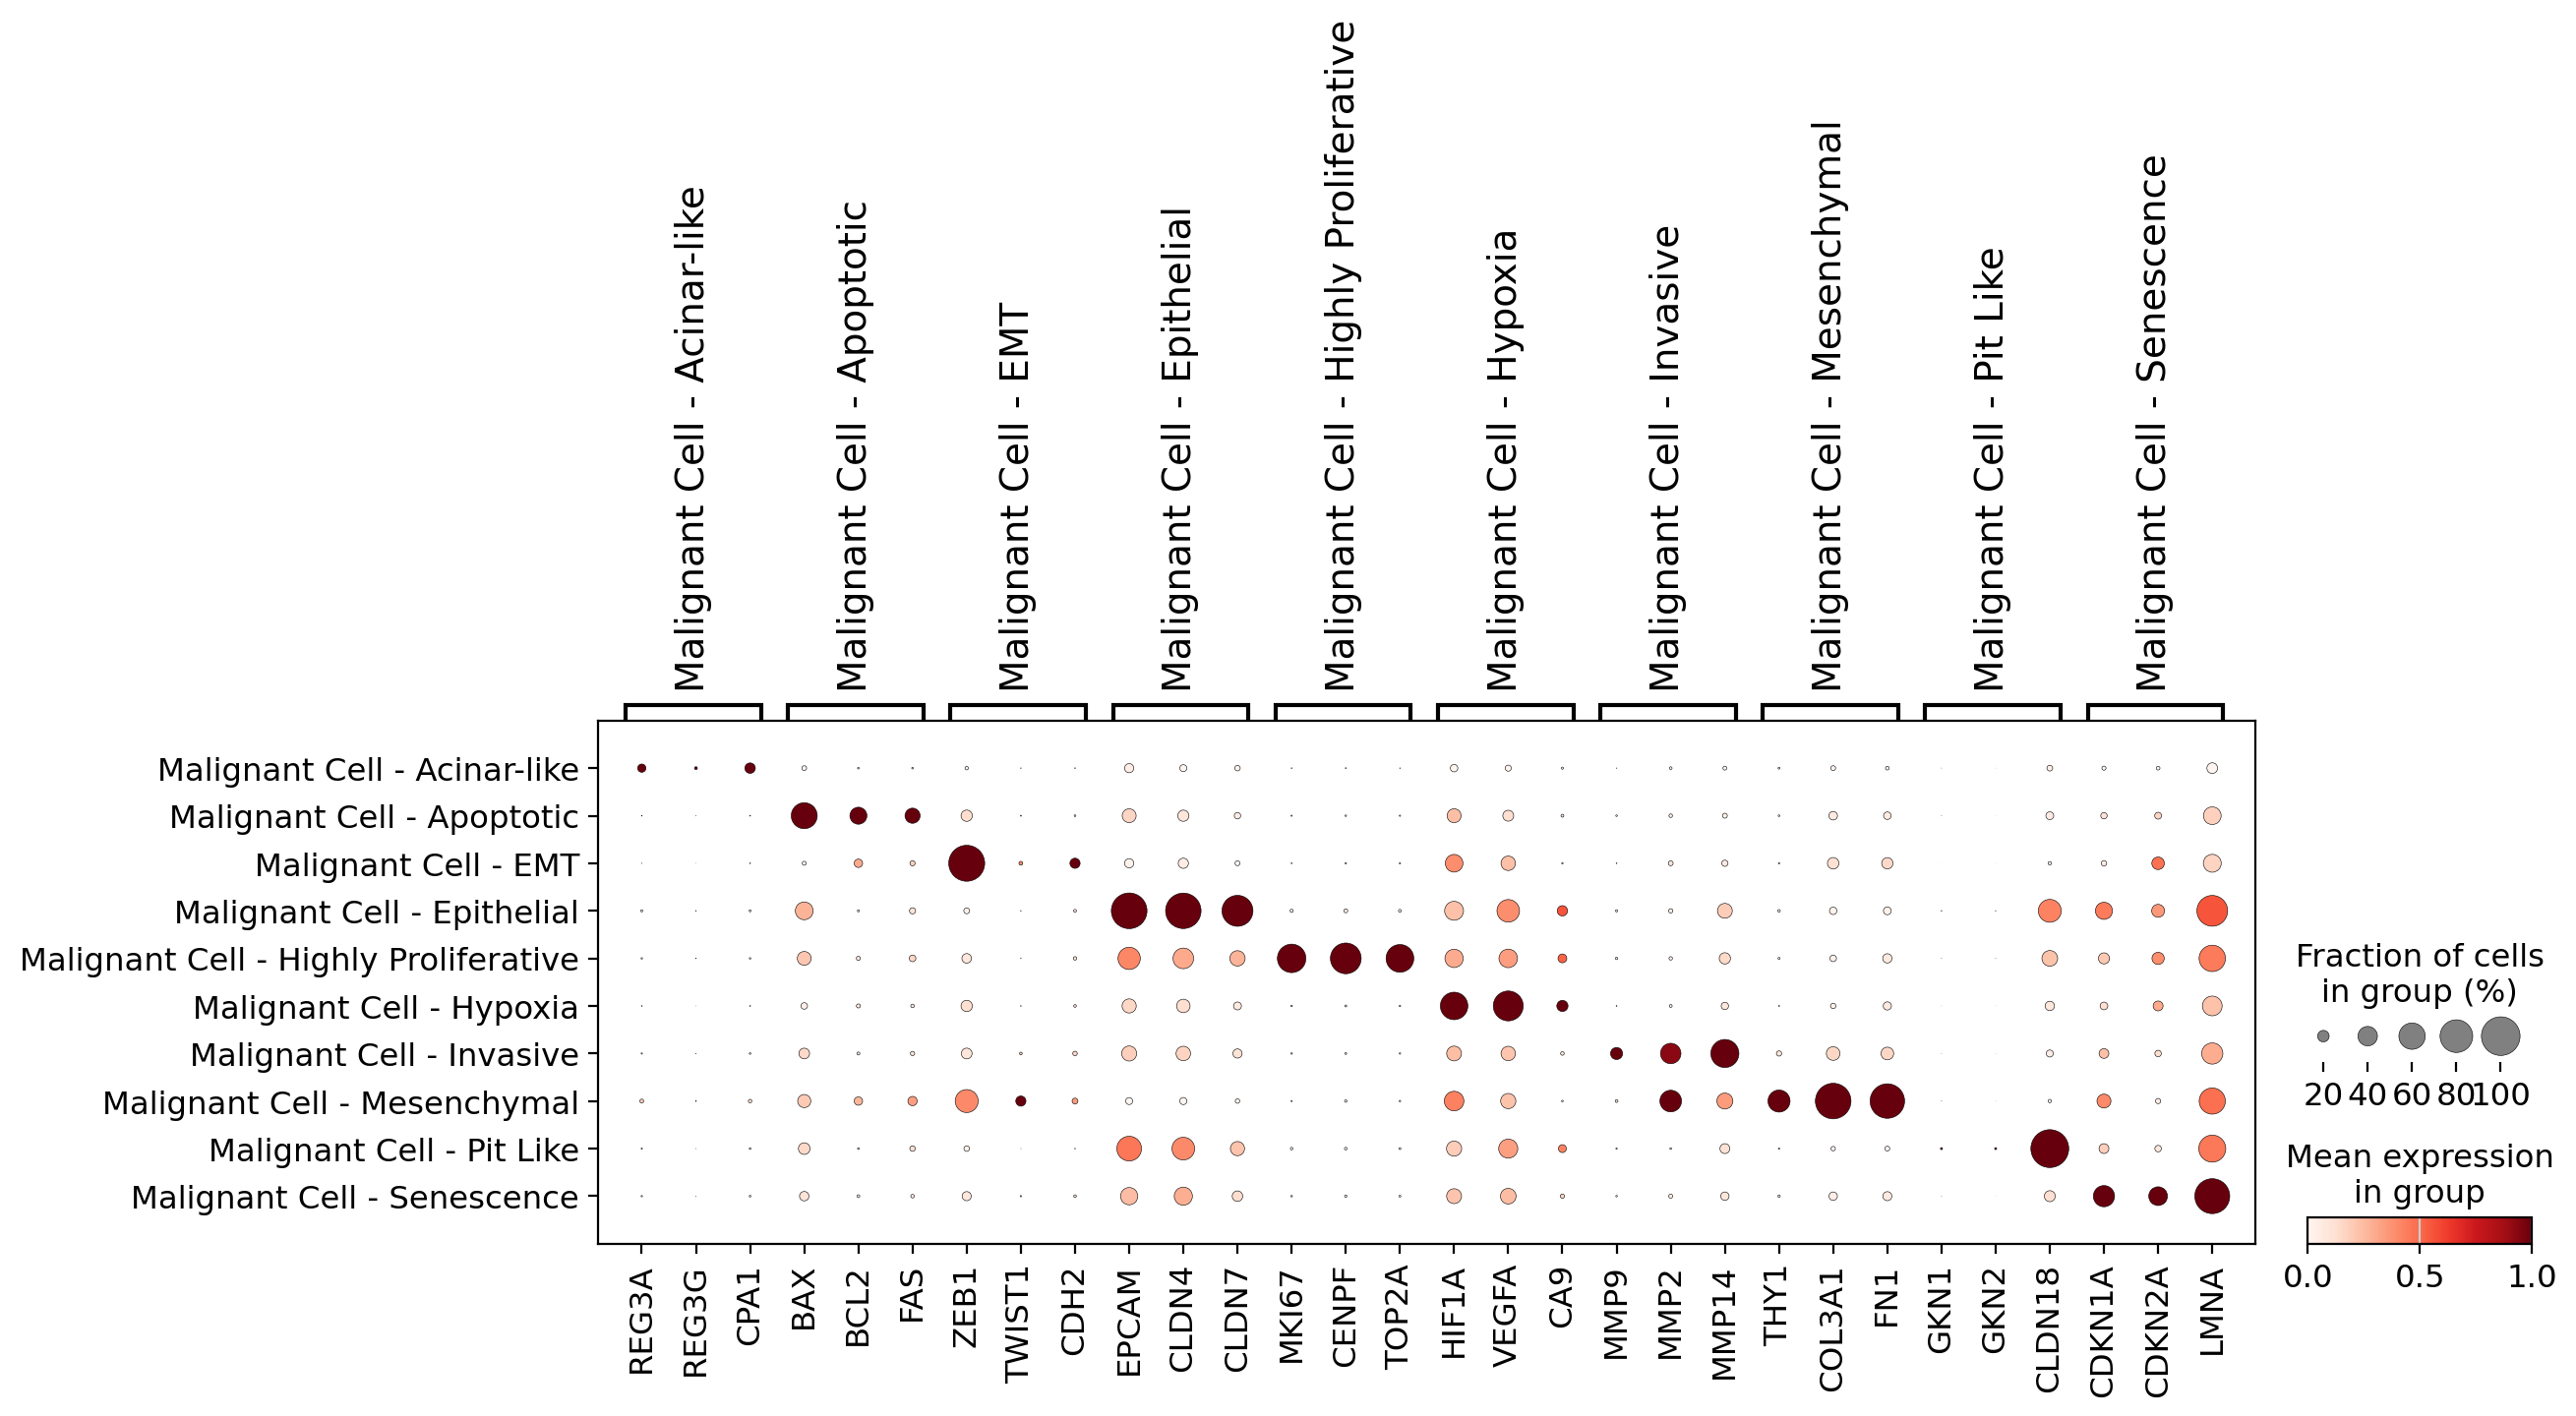

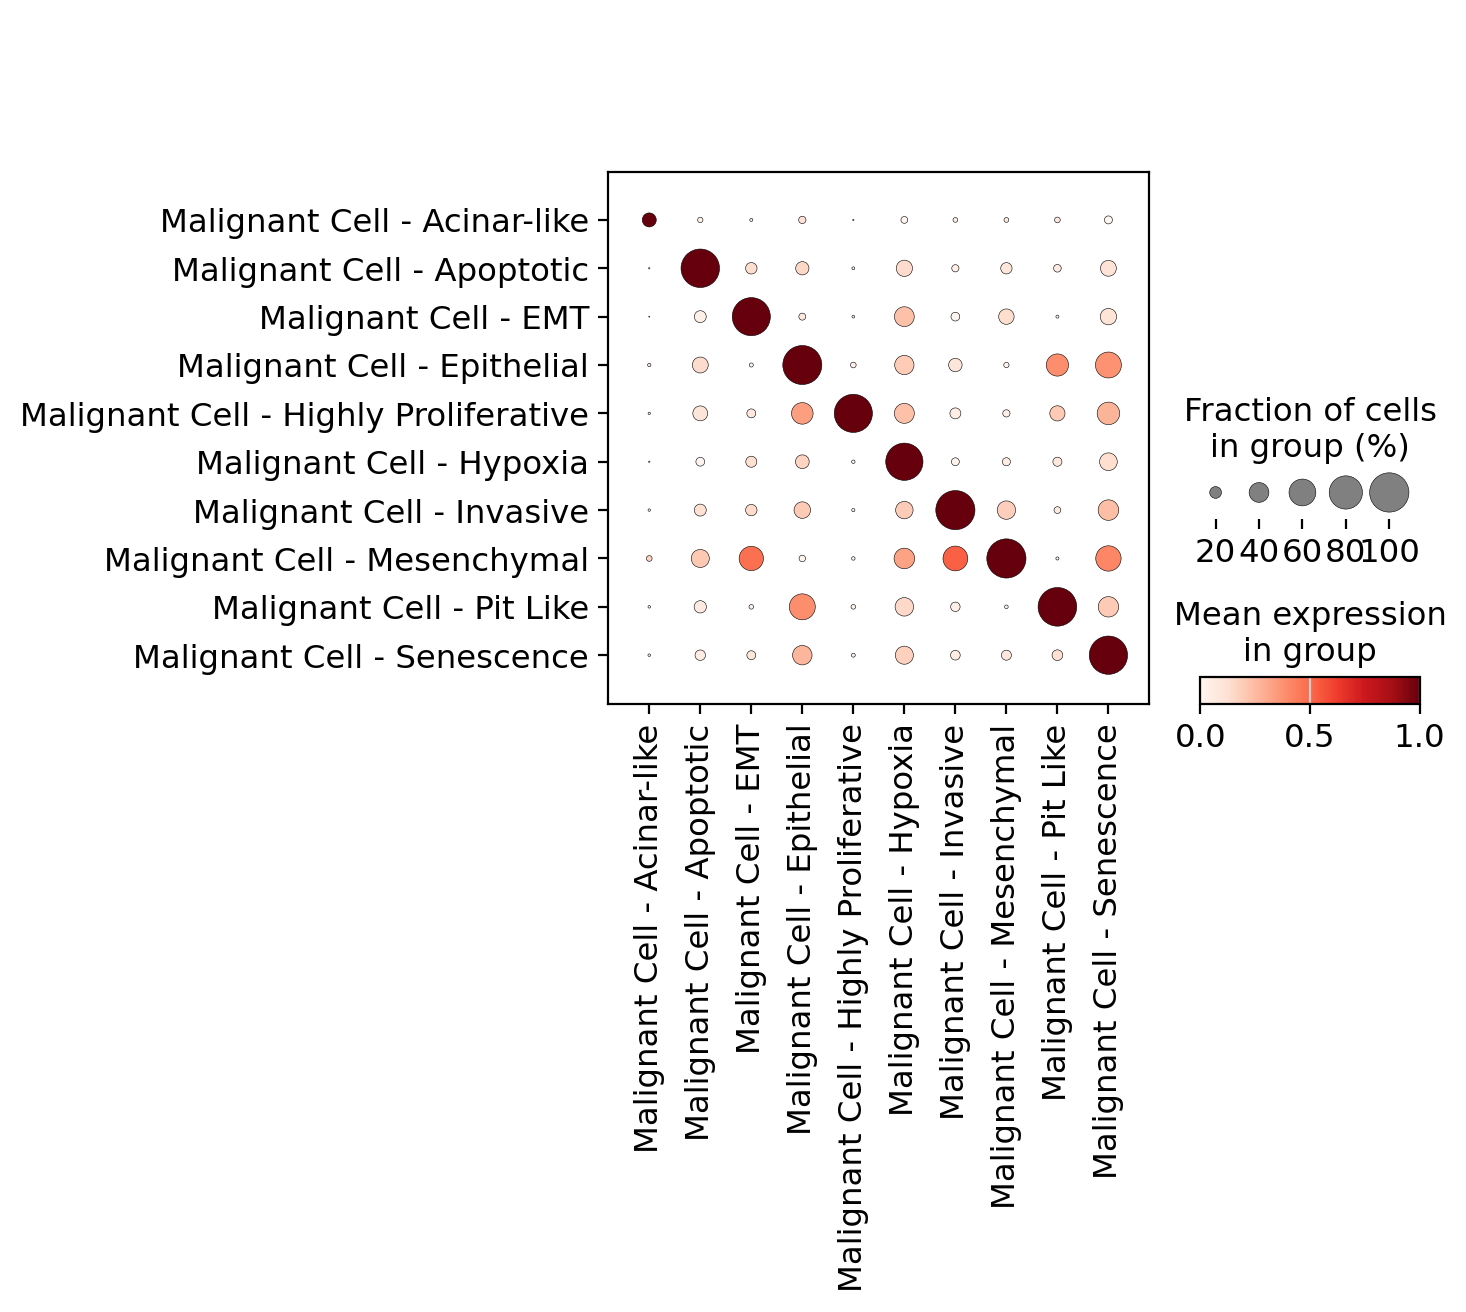

In [23]:
malignant = classify_celltypes_by_score(
    adata=malignant,
    markers_dict=mal_markers,
    embedding_key="scanvi_emb",
    layer="log_norm",
    score_threshold=0.0,
    knn_k=25
)

In [24]:
malignant.obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0  AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0  AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0  AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0  AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                              Unique_ID Technology  n_genes  \
Dataset_Barcode                                                               
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     3440   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     3359   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     1398   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     1408   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2827   

                                               n_counts  log_counts   mt_frac  \
Dataset_Barcode                                                                 
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   10981.0    9.303922  0.068573   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0   10589.0    9.267571  0.133724   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0    5512.0    8.614683  0.071662   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0    2960.0    7.992945  0.029054   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0    7694.0    8.948196  0.180270   

                                               n_genes_by_counts  ...  \
Dataset_Barcode                                                   ...   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440  ...   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0               3359  ...   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0               1398  ...   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0               1408  ...   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0               2827  ...   

                                               Malignant Cell - Epithelial  \
Dataset_Barcode                                                              
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                    -0.851250   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0                     0.077396   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0                    -0.200544   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0                    -0.875715   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0                    -0.662179   

                                               Malignant Cell - Highly Proliferative  \
Dataset_Barcode                                                                        
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0                              -0.124336   
Ding_AAAGTCCGTTTCACAG-1-HT056P-S1PAA1-0-0-0-0                              -0.107659   
Ding_AACCACACAGGGAATC-1-HT056P-S1PAA1-0-0-0-0                              -0.051734   
Ding_AACCACAGTTTACGTG-1-HT056P-S1PAA1-0-0-0-0                              -0.044300   
Ding_AACCATGTCAACTACG-1-HT056P-S1PAA1-0-0-0-0                              -0.108262   

                                               Malignant Cell - Hypoxia  \
Dataset_Barco

In [70]:
malignant.obs.celltype_knn.value_counts()

celltype_knn
Malignant Cell - Epithelial              61411
Malignant Cell - Mesenchymal             46077
Malignant Cell - Hypoxia                 28721
Malignant Cell - Senescence              28358
Malignant Cell - Pit Like                18986
Malignant Cell - EMT                     15060
Malignant Cell - Highly Proliferative    10365
Malignant Cell - Apoptotic                8235
Malignant Cell - Acinar-like              6966
Malignant Cell - Invasive                 6889
Name: count, dtype: int64

In [28]:
# add to adata
mask = malignant.obs_names
adata.obs.Level_4 = adata.obs.Level_4.astype(str)
# Assign the new label
adata.obs.loc[mask, 'Level_4'] = malignant.obs['celltype_knn'].reindex(mask)

In [29]:
adata.obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0  AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                              Unique_ID Technology  n_genes  \
Dataset_Barcode                                                               
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2929   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     3440   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     1976   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2446   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2675   

                                               n_counts  log_counts   mt_frac  \
Dataset_Barcode                                                                 
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0   12375.0    9.423433  0.096727   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   10981.0    9.303922  0.068573   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    5352.0    8.585226  0.113416   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0    7301.0    8.895766  0.151760   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    8489.0    9.046527  0.112852   

                                               n_genes_by_counts  ...  \
Dataset_Barcode                                                   ...   
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0               2929  ...   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440  ...   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               1976  ...   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0               2446  ...   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               2675  ...   

                                               EMT category  EMT score  \
Dataset_Barcode                                                          
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   

                                               EMT_score_DL  \
Dataset_Barcode                                               
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0     -1.481311   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           NaN   

                                               Suspicious_Normal  \
Dataset_Barcode                                                    
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0              Other   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0              Other   
Ding_AAACCCACAACTCC

# T Cells

In [39]:
list_t = adata.obs.Level_3.unique().tolist()

In [40]:
[i for i in list_t if 'T' in i]

['Mixed T Cell', 'CD4+ T Cell', 'CD8+ T Cell', 'Malignant Cell - EMT']

In [32]:
cd8_subsets = {
   "CD8+ Effector T Cell": ["GZMB", "GZMK", "PRF1", "IFNG"],
   "CD8+ Exhausted T Cell": ["PDCD1", "HAVCR2", "LAG3", "TOX"],
   "CD8+ Memory T Cell": ["CCR7", "CD27", "SELL"],
   "CD8+ Naive T Cell": ["SELL", "CCR7", "LEF1"],
   "CD8+ Terminal Effector T Cell": ["ZEB2", "GZMB", "IFNG", "TBX21"],
   "CD8+ Tissue-Resident Memory T Cell": ["ITGAE", "CXCR6", "ZNF683"]}

In [58]:
cd4_subsets = {
   "CD4+ Th1 Cell": ["STAT4", "CXCR3", "IFNG"],
   "CD4+ Th2 Cell": ["GATA3", "CCR4", "PTGDR2"],
   "CD4+ Th17 Cell": ["IL17A", "IL17F", "RORC", "KLRB1", "CCR6"],
   "CD4+ Th22 Cell": ["IL22", "CCR10", "FOXO4"],
   "CD4+ Naive Cell": ["CCR7", "SELL", "LEF1", "TCF7"],
   "CD4+ Central Memory T Cell": ["GPR183", "TCF7", "SELL"],  # "IL7R", "TCF7"
   "γδ T Cell (Vδ1)": ["TRDC"],
   "T-reg": ["FOXP3", "IL2RA", "CTLA4", "TNFRSF18"], #"IKZF2", 
   "Double Positive CD4+CD8+ T Cell": ["CD4", "CD8A", "CD8B"]}

In [71]:
cd4_t = adata[adata.obs.Level_3.isin(['Mixed T Cell', 'CD4+ T Cell'])] #.copy()

In [72]:
cd4_t

View of AnnData object with n_obs × n_vars = 44149 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment', 'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category', 'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75', 'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75', 'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75', 'Adipocyte_leiden_0.75

Score genes
Scoring CD4+ Central Memory T Cell
Scoring CD4+ Naive Cell
Scoring CD4+ Th1 Cell
Scoring CD4+ Th17 Cell
Scoring CD4+ Th2 Cell
Scoring CD4+ Th22 Cell
Scoring Double Positive CD4+CD8+ T Cell
Scoring T-reg
Scoring γδ T Cell (Vδ1)
Assign highest scoring cell type
Train kNN on confident cells
Store results
Plotting


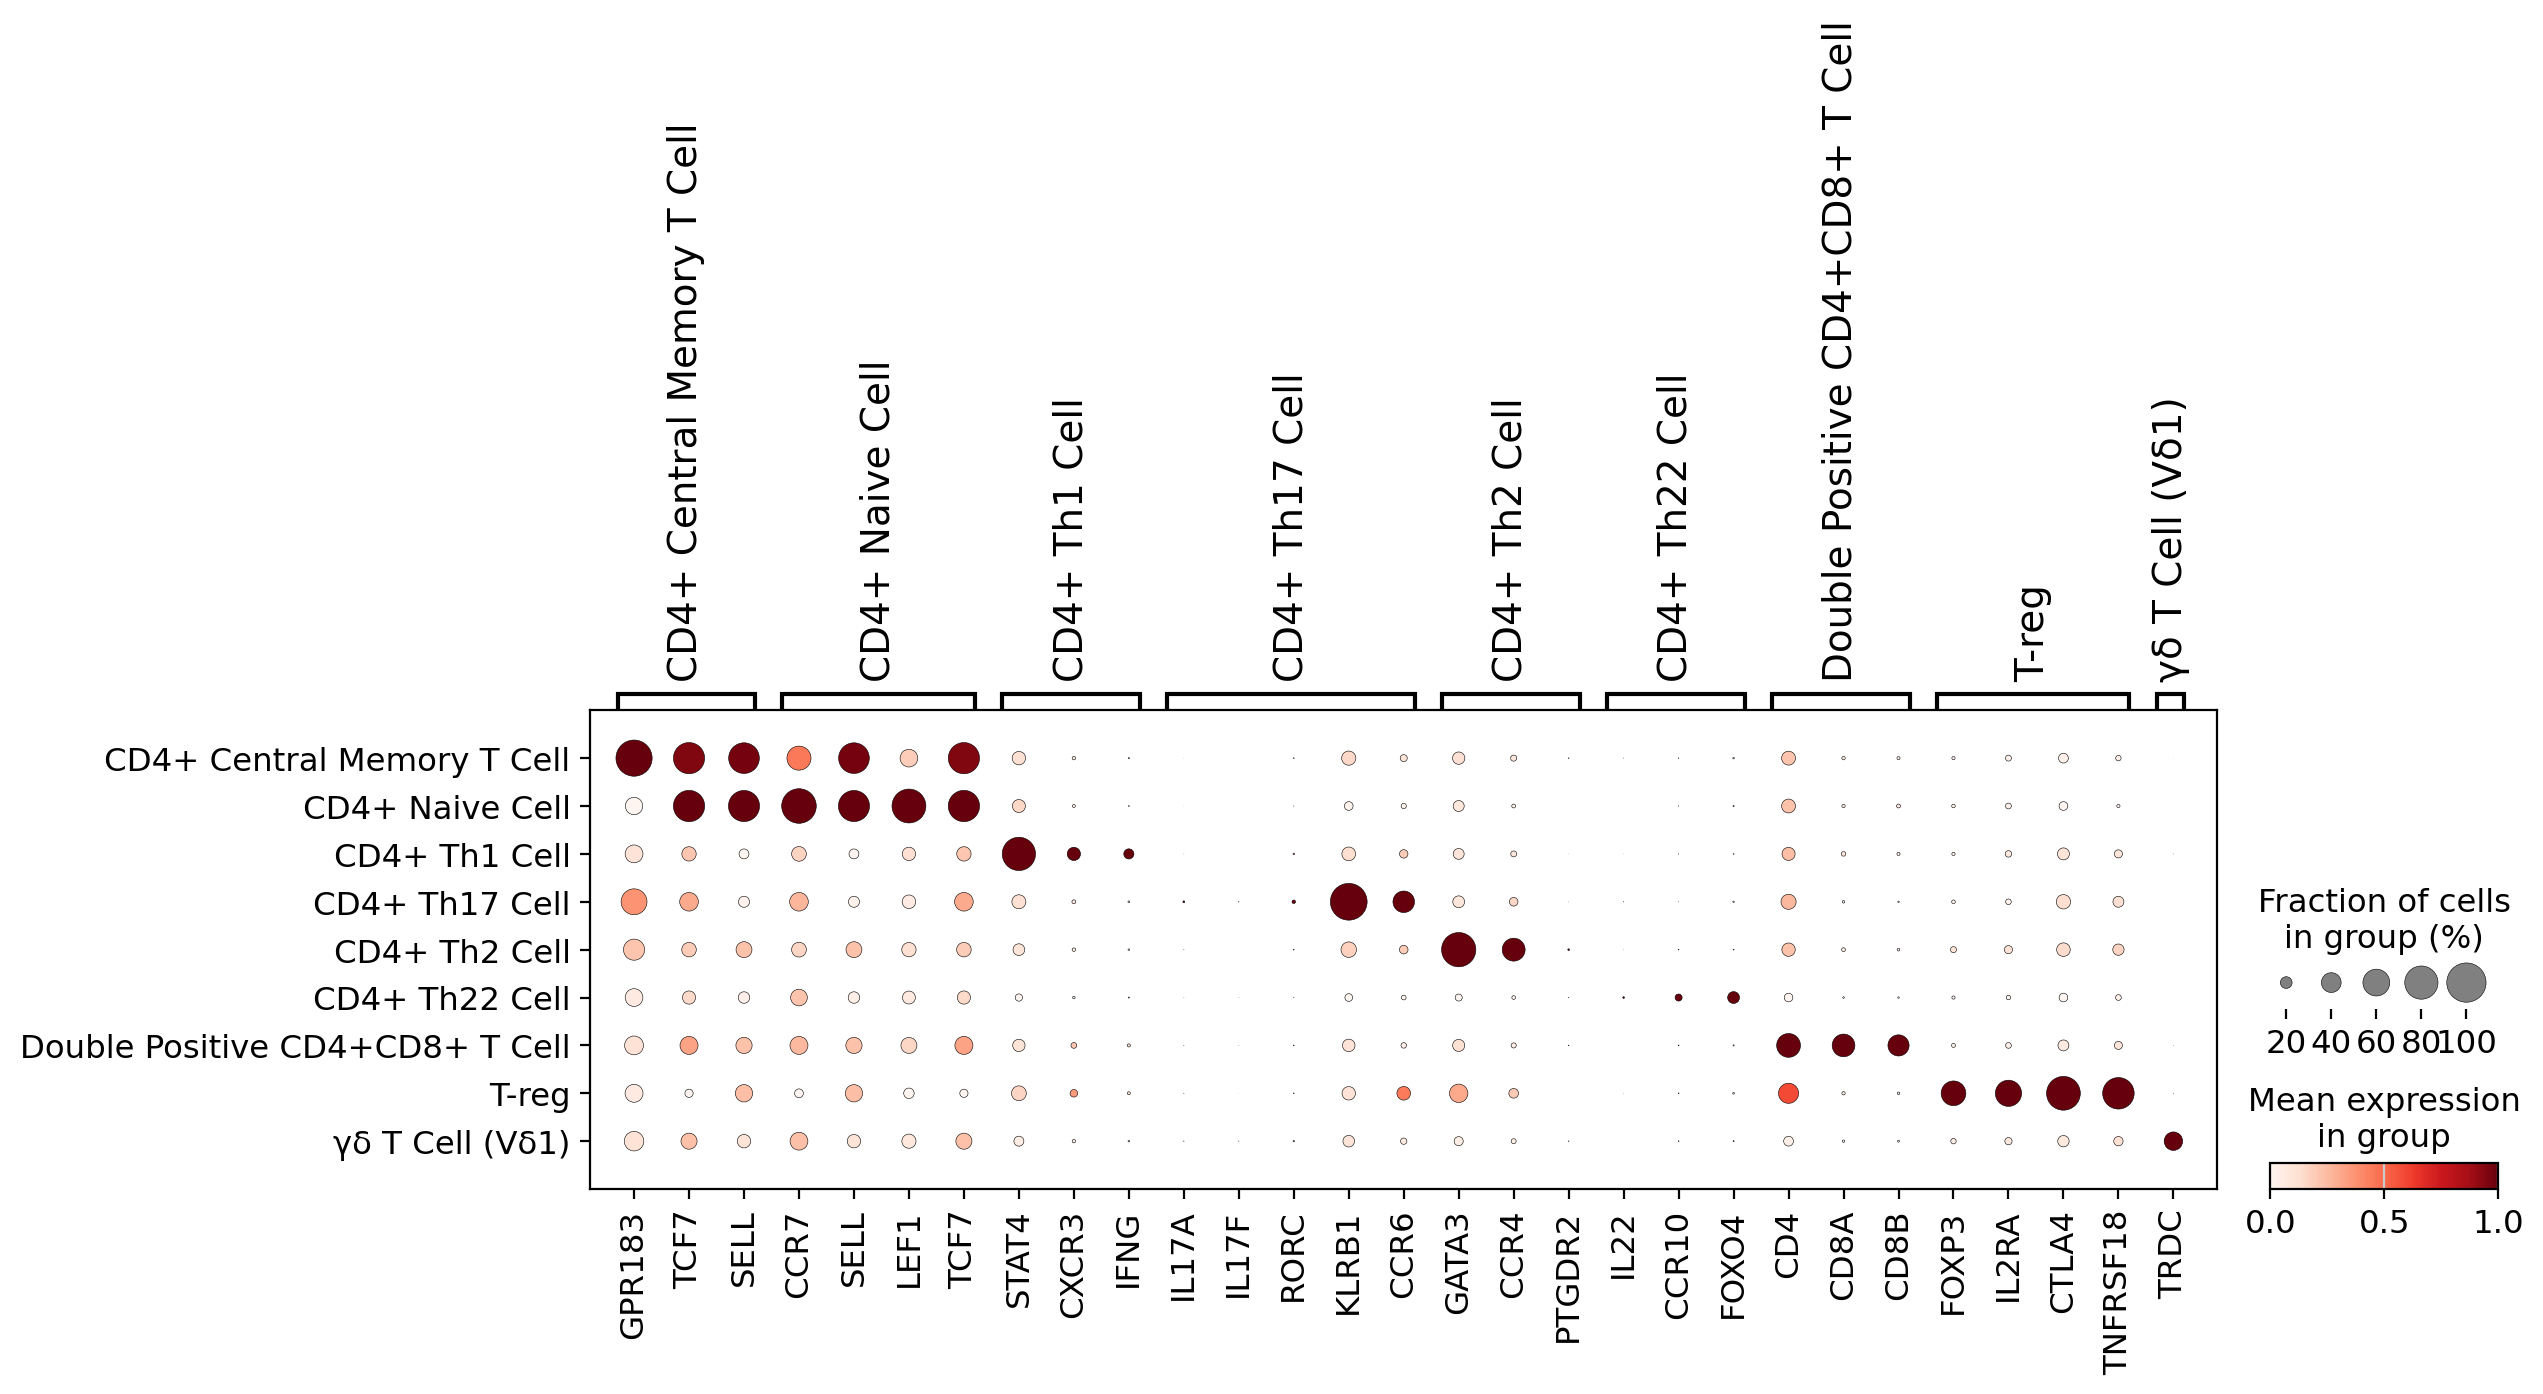

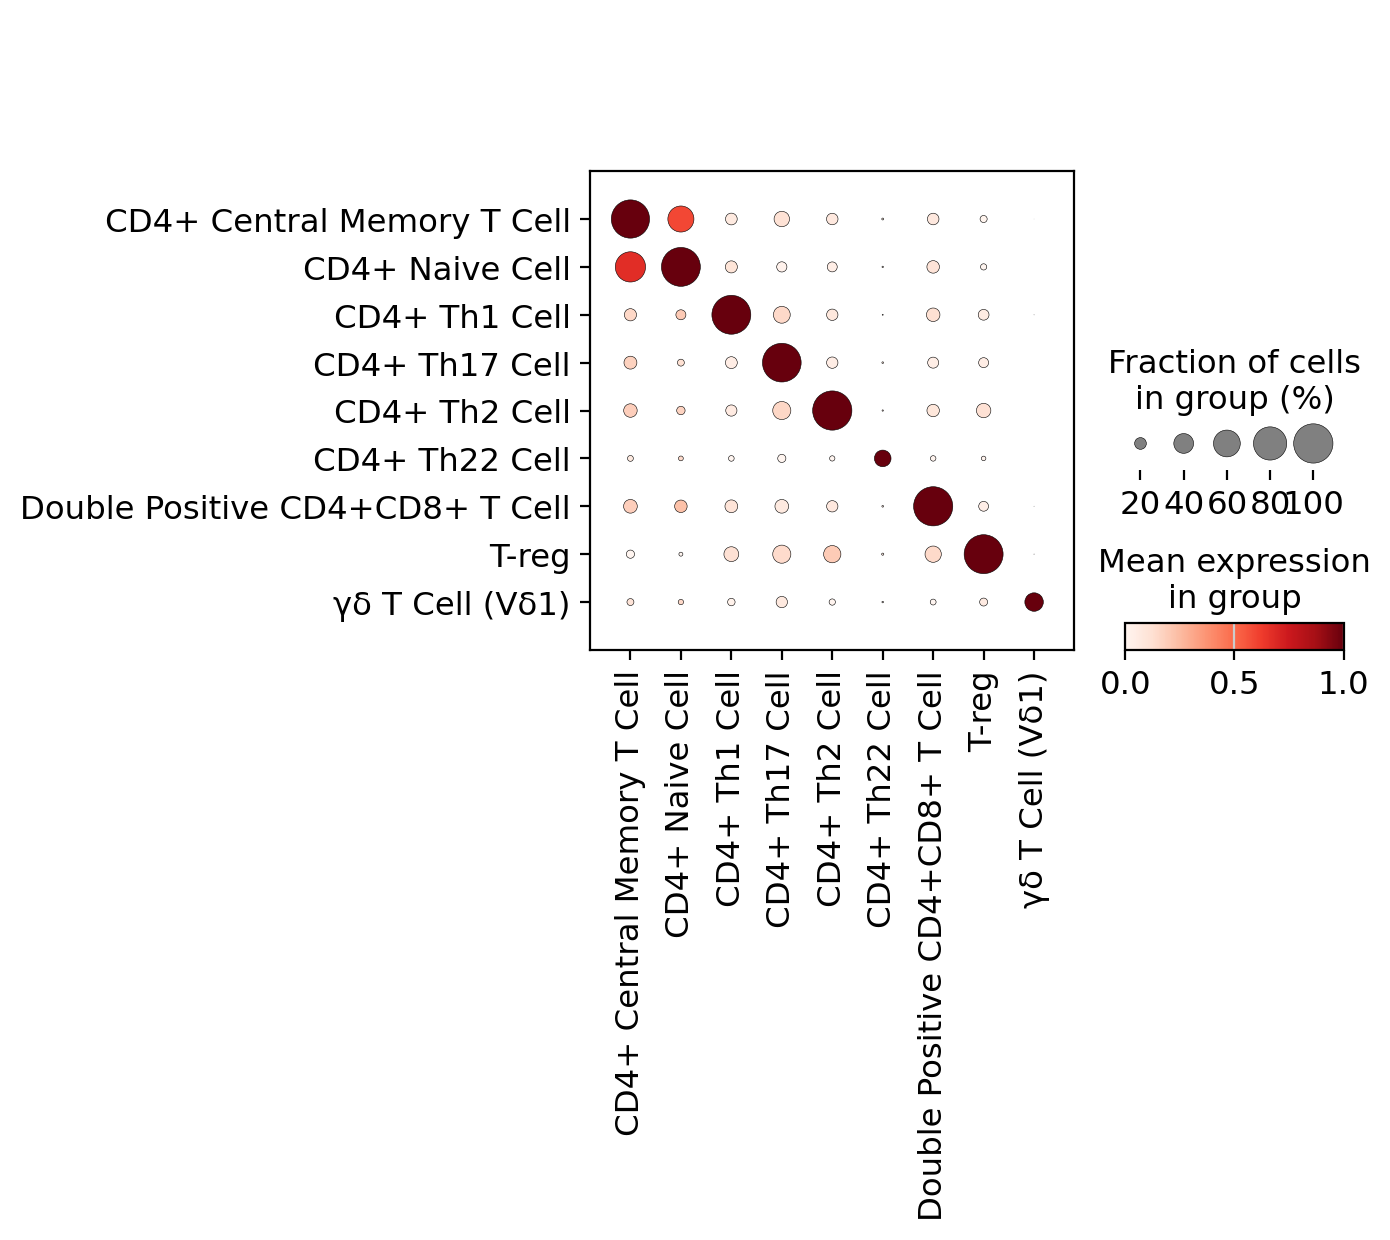

In [73]:
cd4_t = classify_celltypes_by_score(
    adata=cd4_t,
    markers_dict=cd4_subsets,
    embedding_key="scanvi_emb",
    layer="log_norm",
    score_threshold=0.0,
    knn_k=25
)

In [74]:
cd4_t.obs.celltype_knn.value_counts()

celltype_knn
CD4+ Th17 Cell                     8993
T-reg                              8921
CD4+ Central Memory T Cell         8388
CD4+ Naive Cell                    4664
CD4+ Th1 Cell                      4488
Double Positive CD4+CD8+ T Cell    3100
CD4+ Th2 Cell                      2703
CD4+ Th22 Cell                     1733
γδ T Cell (Vδ1)                    1159
Name: count, dtype: int64

In [83]:
# add to adata
mask = cd4_t.obs_names
adata.obs.Level_4 = adata.obs.Level_4.astype(str)
# Assign the new label
adata.obs.loc[mask, 'Level_4'] = cd4_t.obs['celltype_knn'].reindex(mask)

In [75]:
cd8_t = adata[adata.obs.Level_3.isin(['CD8+ T Cell'])] #.copy()

Score genes
Scoring CD8+ Effector T Cell
Scoring CD8+ Exhausted T Cell
Scoring CD8+ Memory T Cell
Scoring CD8+ Naive T Cell
Scoring CD8+ Terminal Effector T Cell
Scoring CD8+ Tissue-Resident Memory T Cell
Assign highest scoring cell type
Train kNN on confident cells
Store results
Plotting


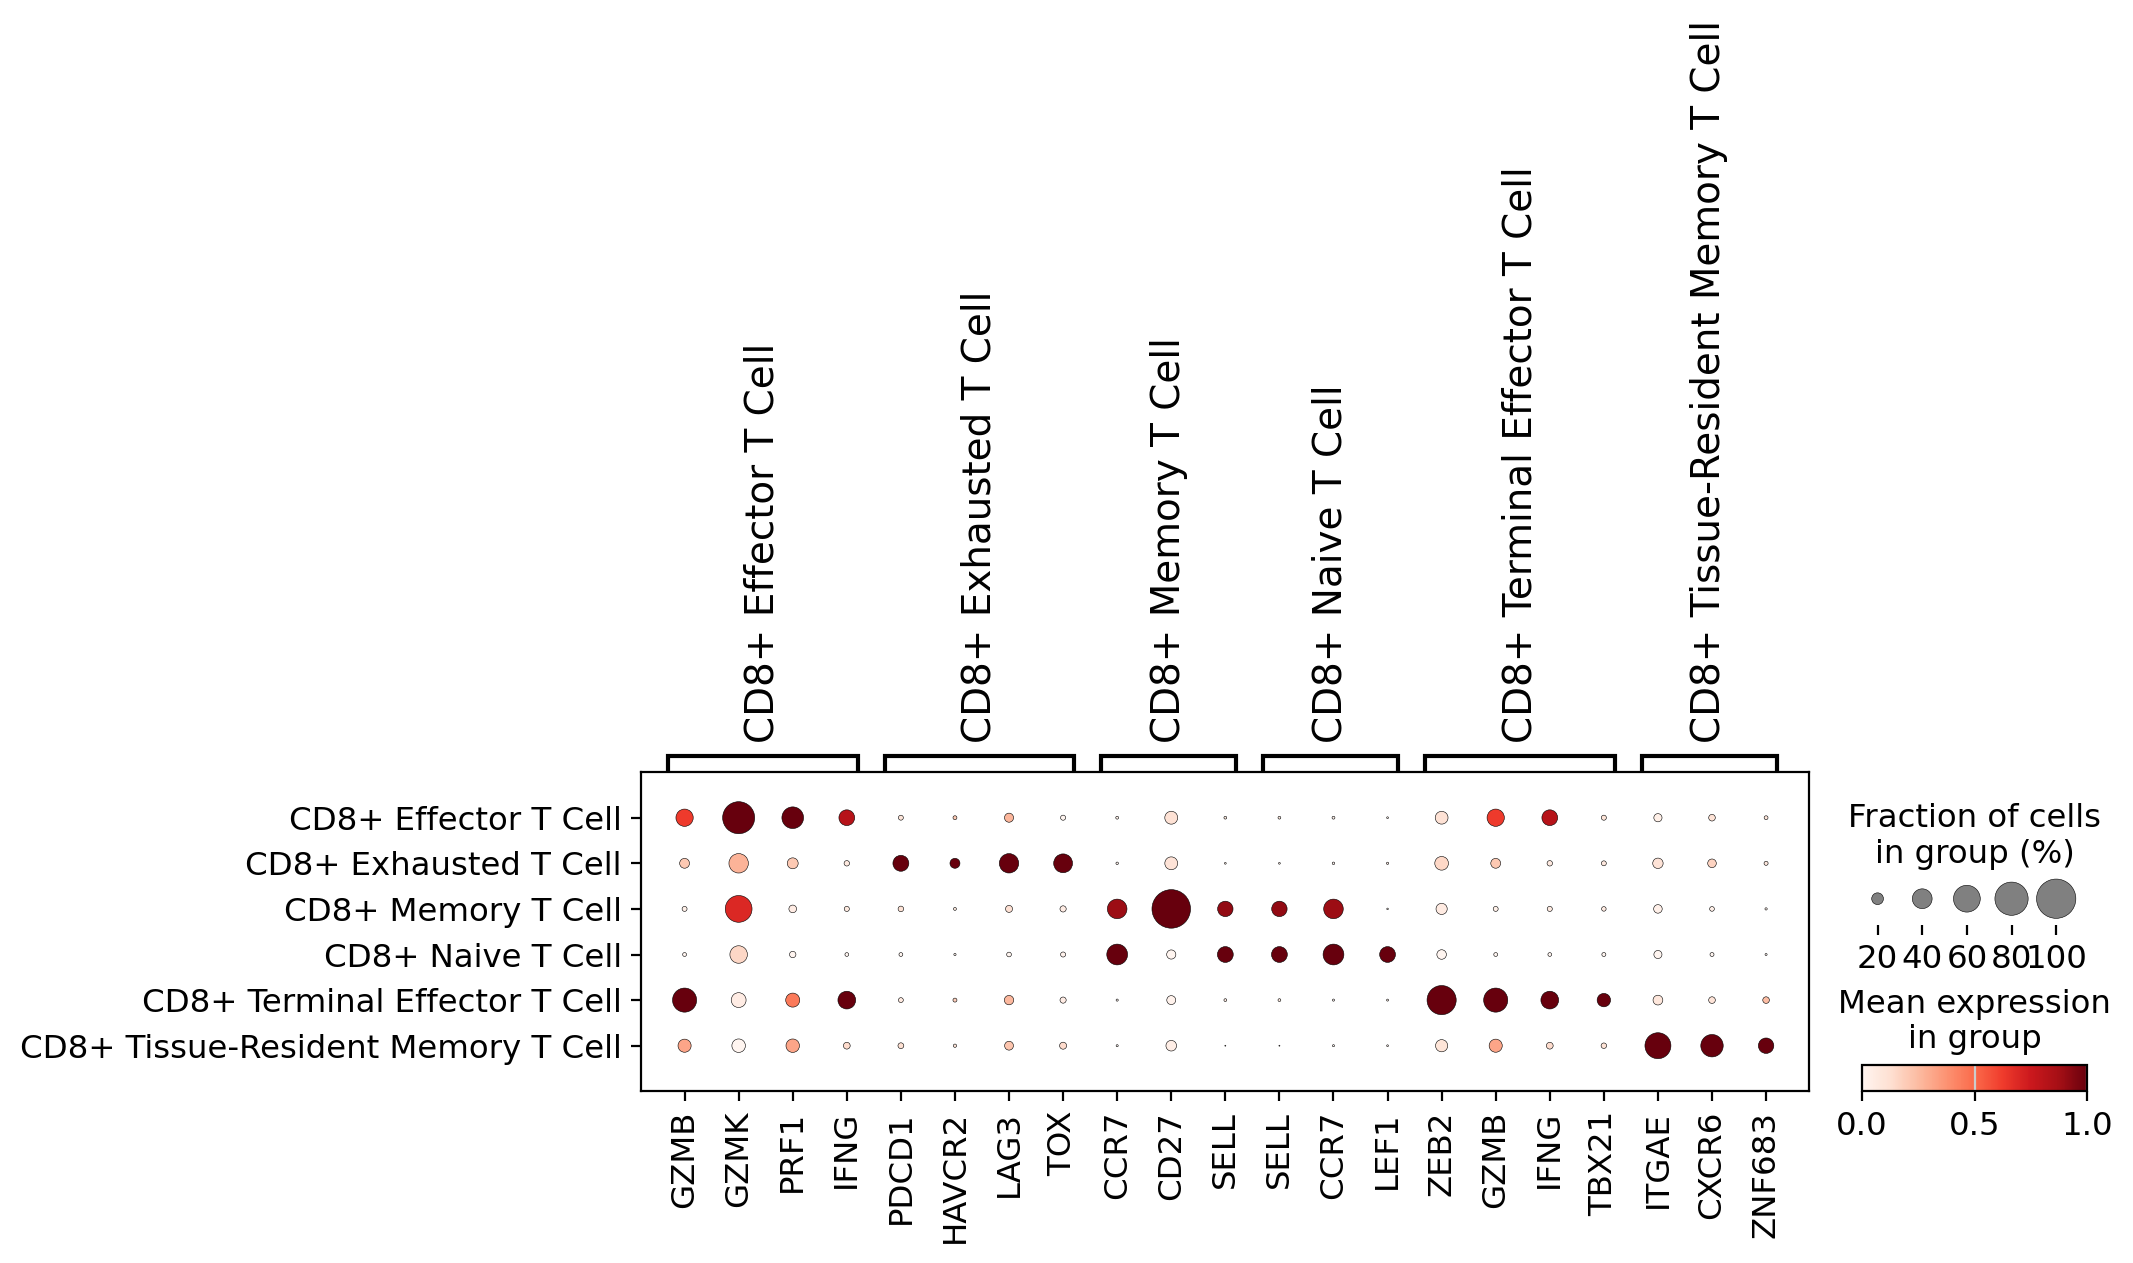

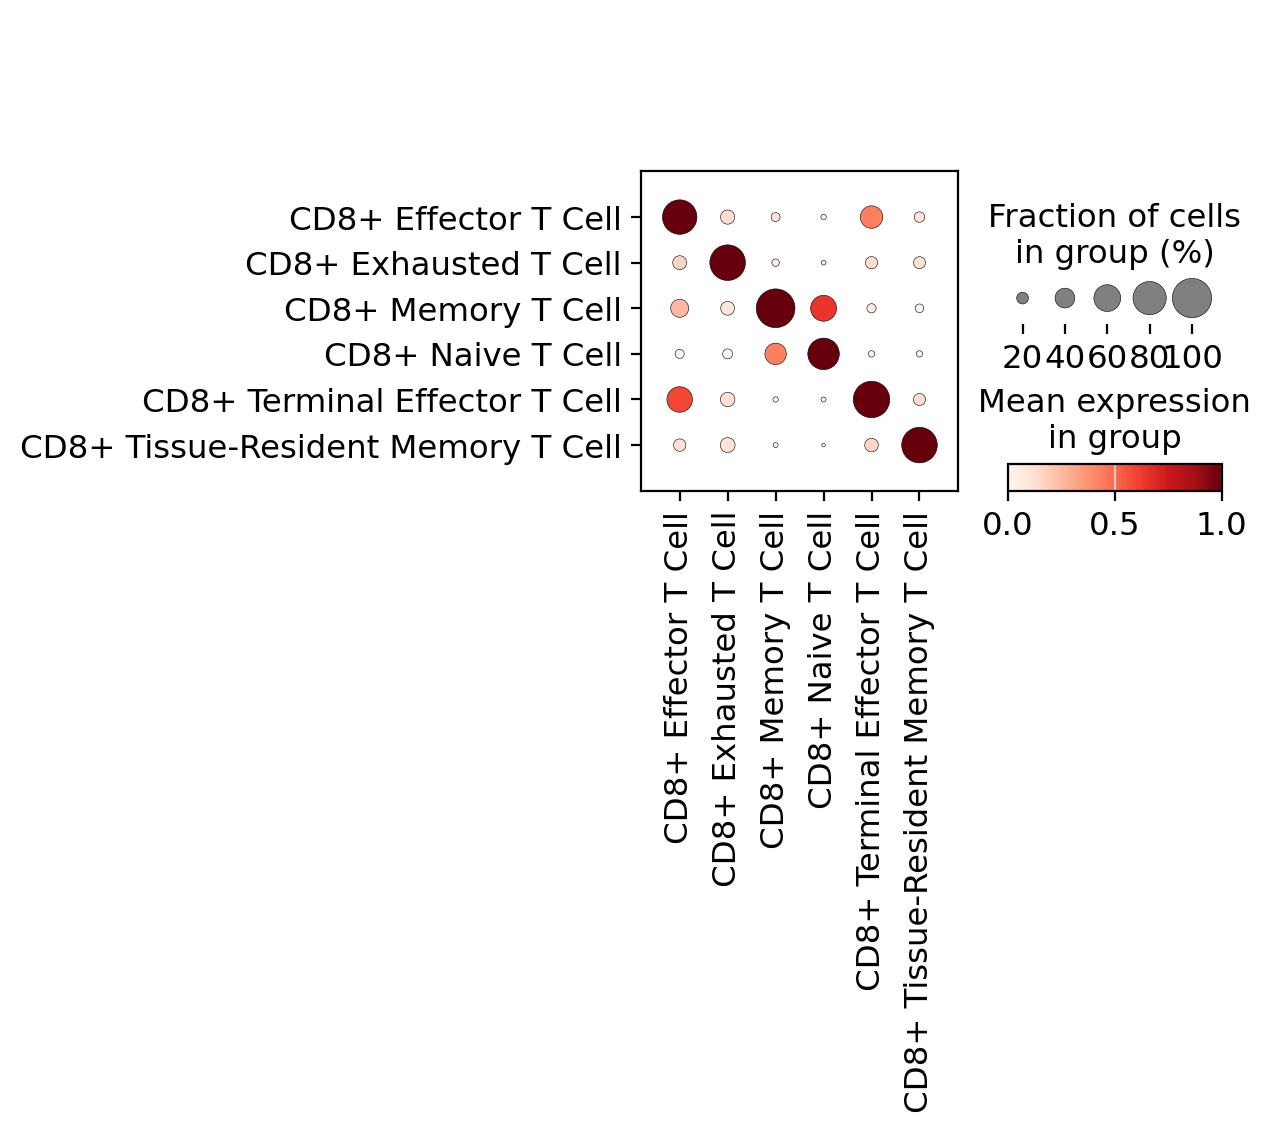

In [76]:
cd8_t = classify_celltypes_by_score(
    adata=cd8_t,
    markers_dict=cd8_subsets,
    embedding_key="scanvi_emb",
    layer="log_norm",
    score_threshold=0.0,
    knn_k=25
)

In [84]:
cd8_t.obs.celltype_knn.value_counts()

celltype_knn
CD8+ Effector T Cell                  20824
CD8+ Naive T Cell                     17770
CD8+ Exhausted T Cell                 15051
CD8+ Terminal Effector T Cell         14049
CD8+ Tissue-Resident Memory T Cell    12773
CD8+ Memory T Cell                     4553
Name: count, dtype: int64

In [85]:
# add to adata
mask = cd8_t.obs_names
adata.obs.Level_4 = adata.obs.Level_4.astype(str)
# Assign the new label
adata.obs.loc[mask, 'Level_4'] = cd8_t.obs['celltype_knn'].reindex(mask)

# Endothelial Cells

In [79]:
endothelial_markers = {
    "Tumor-Associated Endothelial Cell": ["DDIT4", "TIE1", "SEMA6B", "PLCB1", "LYZ"],
    "Vascular Endothelial Cell": ["PECAM1", "CDH5", "PLVAP", "EHD4", "CLEC14A"],
    "Lymphatic Endothelial Cell": ["PROX1", "PDPN", "LYVE1", "FLT4"]
}

In [80]:
endothelial = adata[adata.obs.Level_3.str.contains('Endothelial')]

In [81]:
endothelial

View of AnnData object with n_obs × n_vars = 38238 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment', 'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category', 'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75', 'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75', 'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75', 'Adipocyte_leiden_0.75

Score genes
Scoring Lymphatic Endothelial Cell
Scoring Tumor-Associated Endothelial Cell
Scoring Vascular Endothelial Cell
Assign highest scoring cell type
Train kNN on confident cells
Store results
Plotting


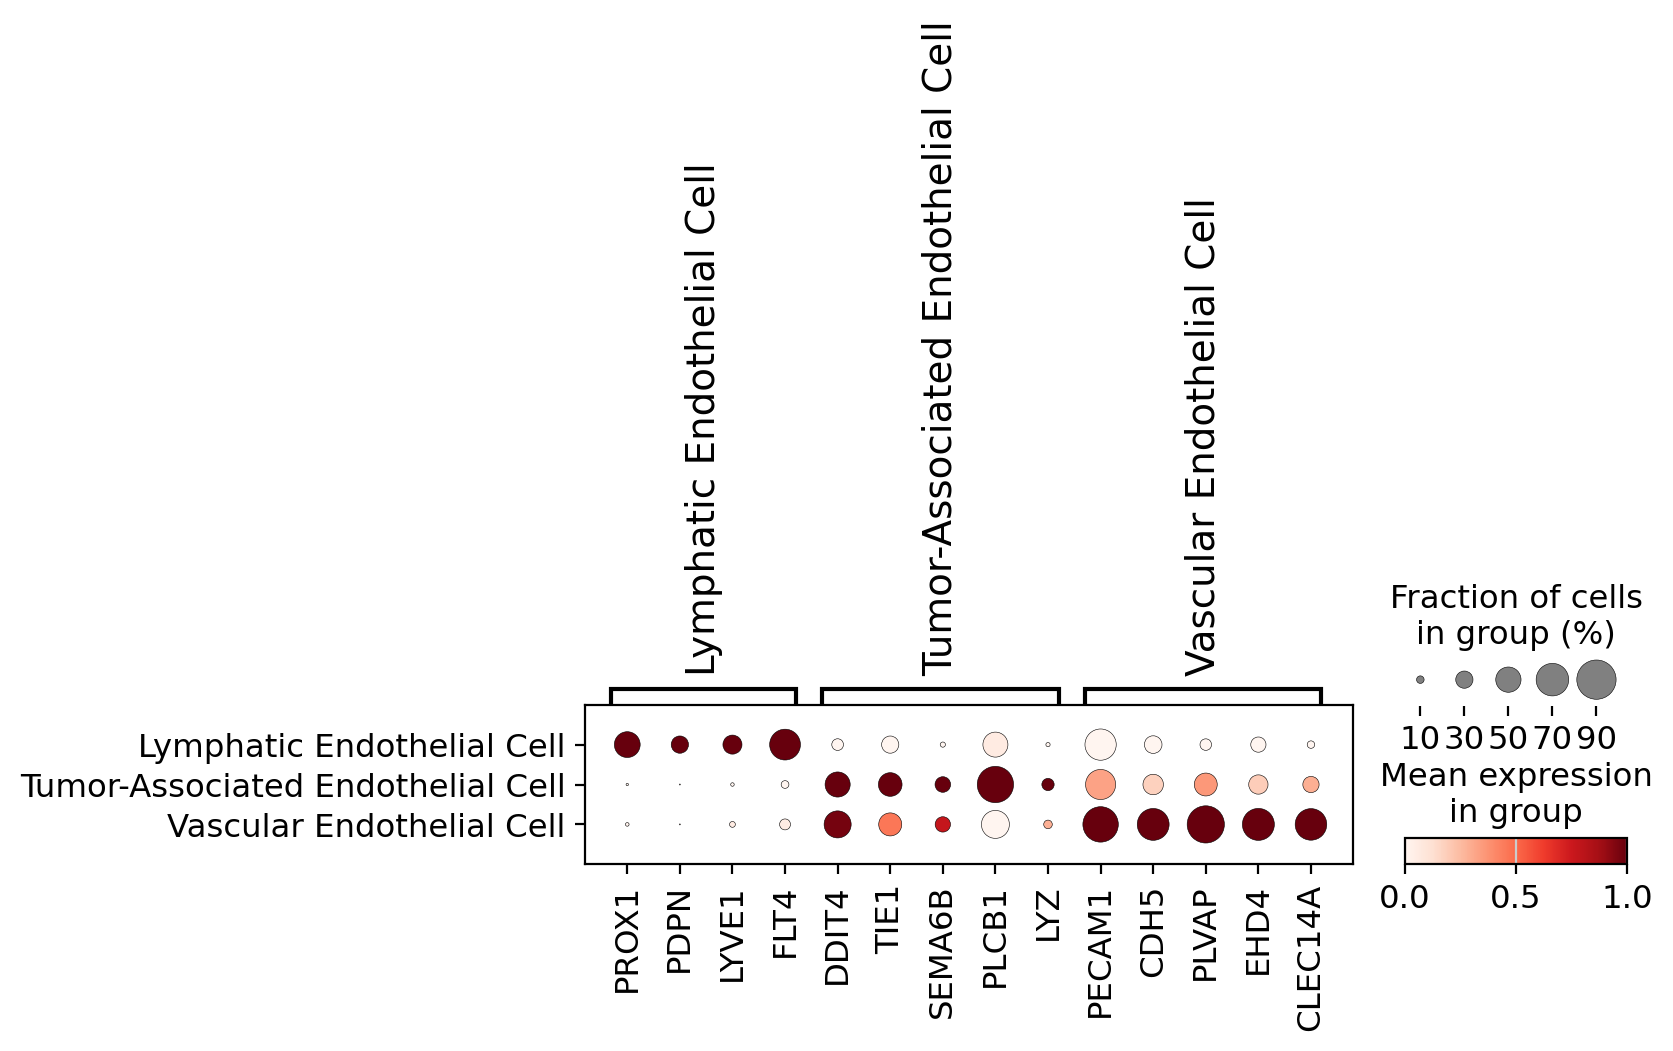

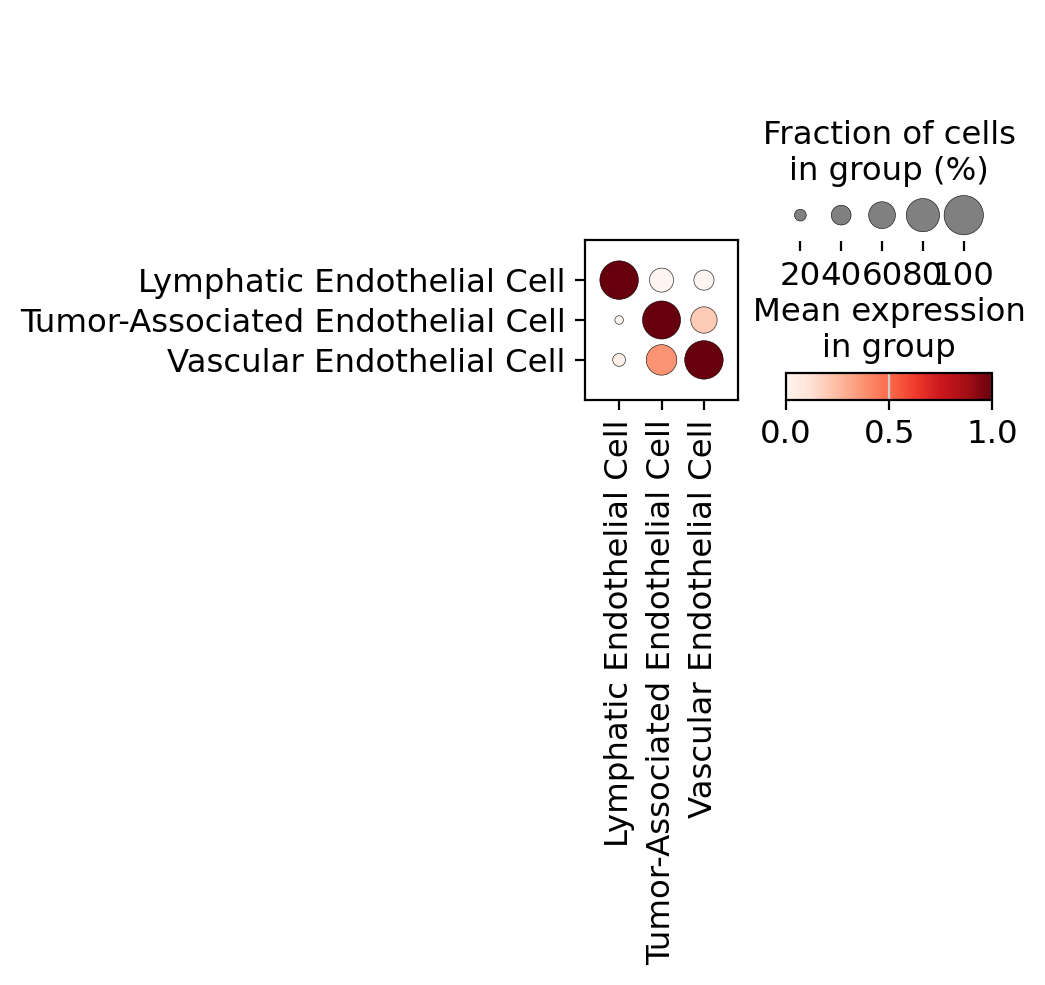

In [82]:
endothelial = classify_celltypes_by_score(
    adata=endothelial,
    markers_dict=endothelial_markers,
    embedding_key="scanvi_emb",
    layer="log_norm",
    score_threshold=0.0,
    knn_k=25
)

In [86]:
# add to adata
mask = endothelial.obs_names
adata.obs.Level_4 = adata.obs.Level_4.astype(str)
# Assign the new label
adata.obs.loc[mask, 'Level_4'] = endothelial.obs['celltype_knn'].reindex(mask)

# B cells

In [93]:
b_cells = adata[adata.obs.Level_3.isin(['B Cell', 'Plasma Cell'])]

In [94]:
b_cells

View of AnnData object with n_obs × n_vars = 29314 × 39024
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment', 'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category', 'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75', 'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75', 'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75', 'Adipocyte_leiden_0.75

In [95]:
b_markers = {
    "B Cell - Naive": ["IL7R", "IGHM", "TCL1A", "CD19"],
    "B Cell - Activated": ["IGHM", "CD69", "CD86"],
    "B Cell - Memory": ["CD27", "IGHE", "IGHA1"],
    "B-reg": ["TFRC", "CD44", "TGFB1"],
    "Plasma Cell": ["MZB1", "XBP1", "PRDM1", "SDC1"],
    "Plasmablast": ["CD27", "CD38", "PRDM1", "IGHG1", "MKI67"],
    "B Cell - Germinal Center": ["AICDA", "BCL6", "RGS13", "S1PR2"]
}

Score genes
Scoring B Cell - Activated
Scoring B Cell - Germinal Center
Scoring B Cell - Memory
Scoring B Cell - Naive
Scoring B-reg
Scoring Plasma Cell
Scoring Plasmablast
Assign highest scoring cell type
Train kNN on confident cells
Store results
Plotting


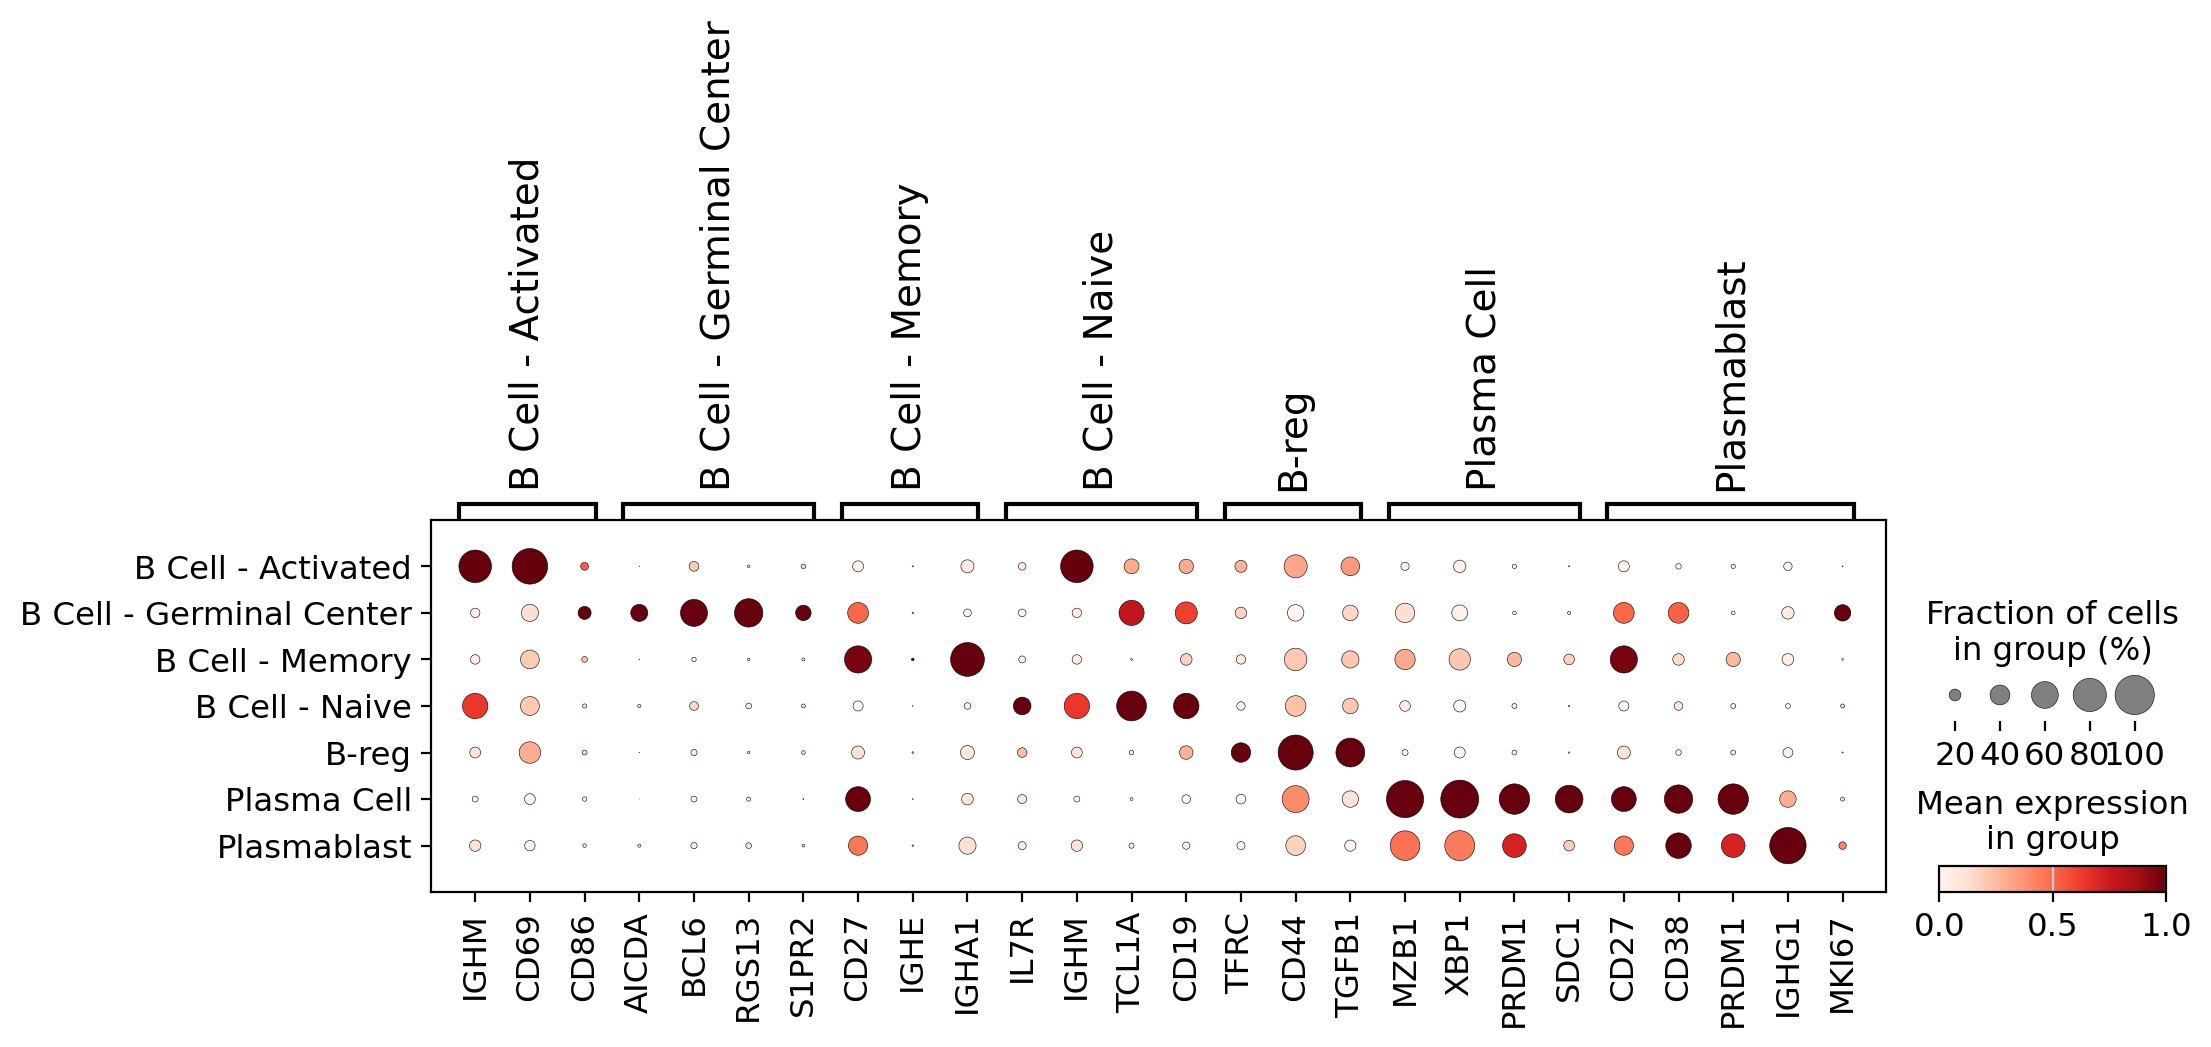

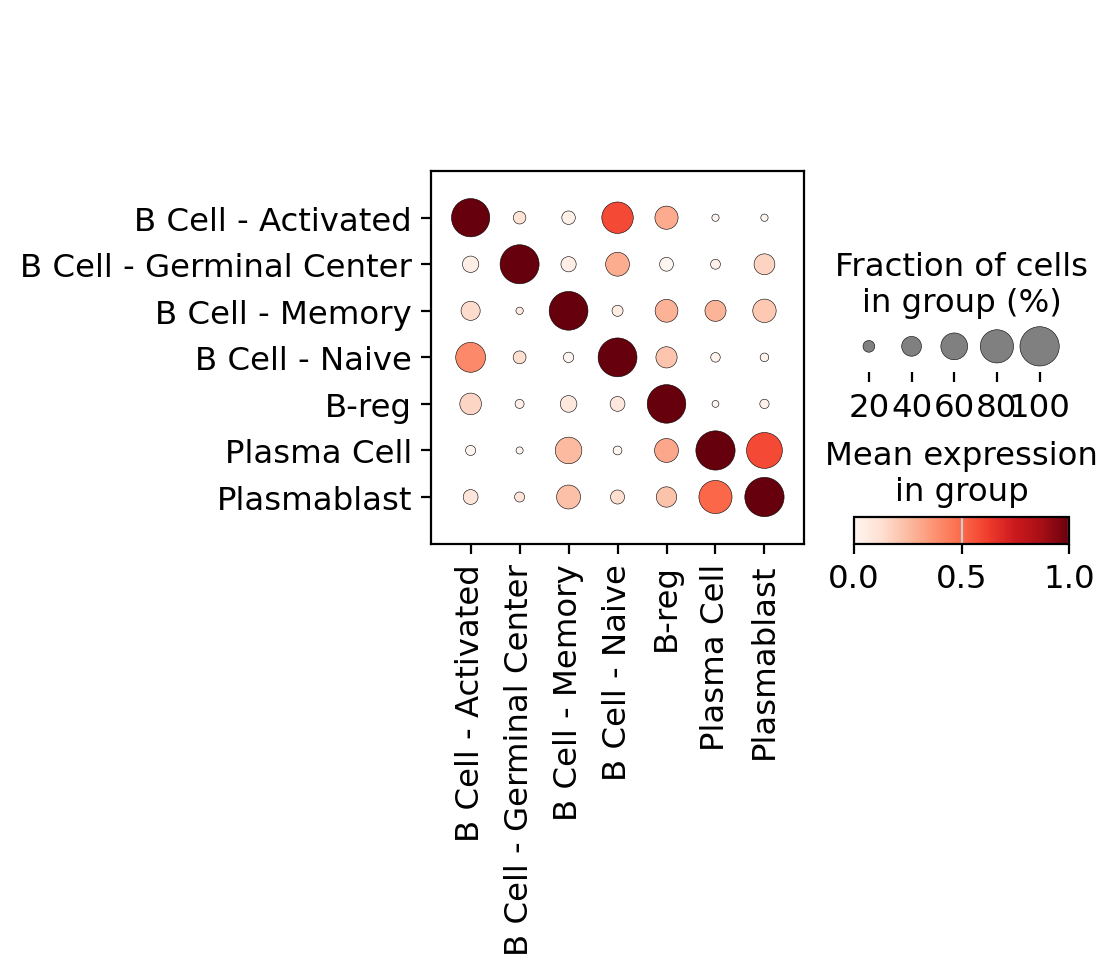

In [96]:
b_cells = classify_celltypes_by_score(
    adata=b_cells,
    markers_dict=b_markers,
    embedding_key="scanvi_emb",
    layer="log_norm",
    score_threshold=0.0,
    knn_k=25
)

In [97]:
b_cells.obs.celltype_knn.value_counts()

celltype_knn
B Cell - Activated          12636
B Cell - Memory              4179
B-reg                        3903
Plasma Cell                  3080
B Cell - Naive               2724
Plasmablast                  1707
B Cell - Germinal Center     1085
Name: count, dtype: int64

In [98]:
# add to adata
mask = b_cells.obs_names
adata.obs.Level_4 = adata.obs.Level_4.astype(str)
# Assign the new label
adata.obs.loc[mask, 'Level_4'] = b_cells.obs['celltype_knn'].reindex(mask)

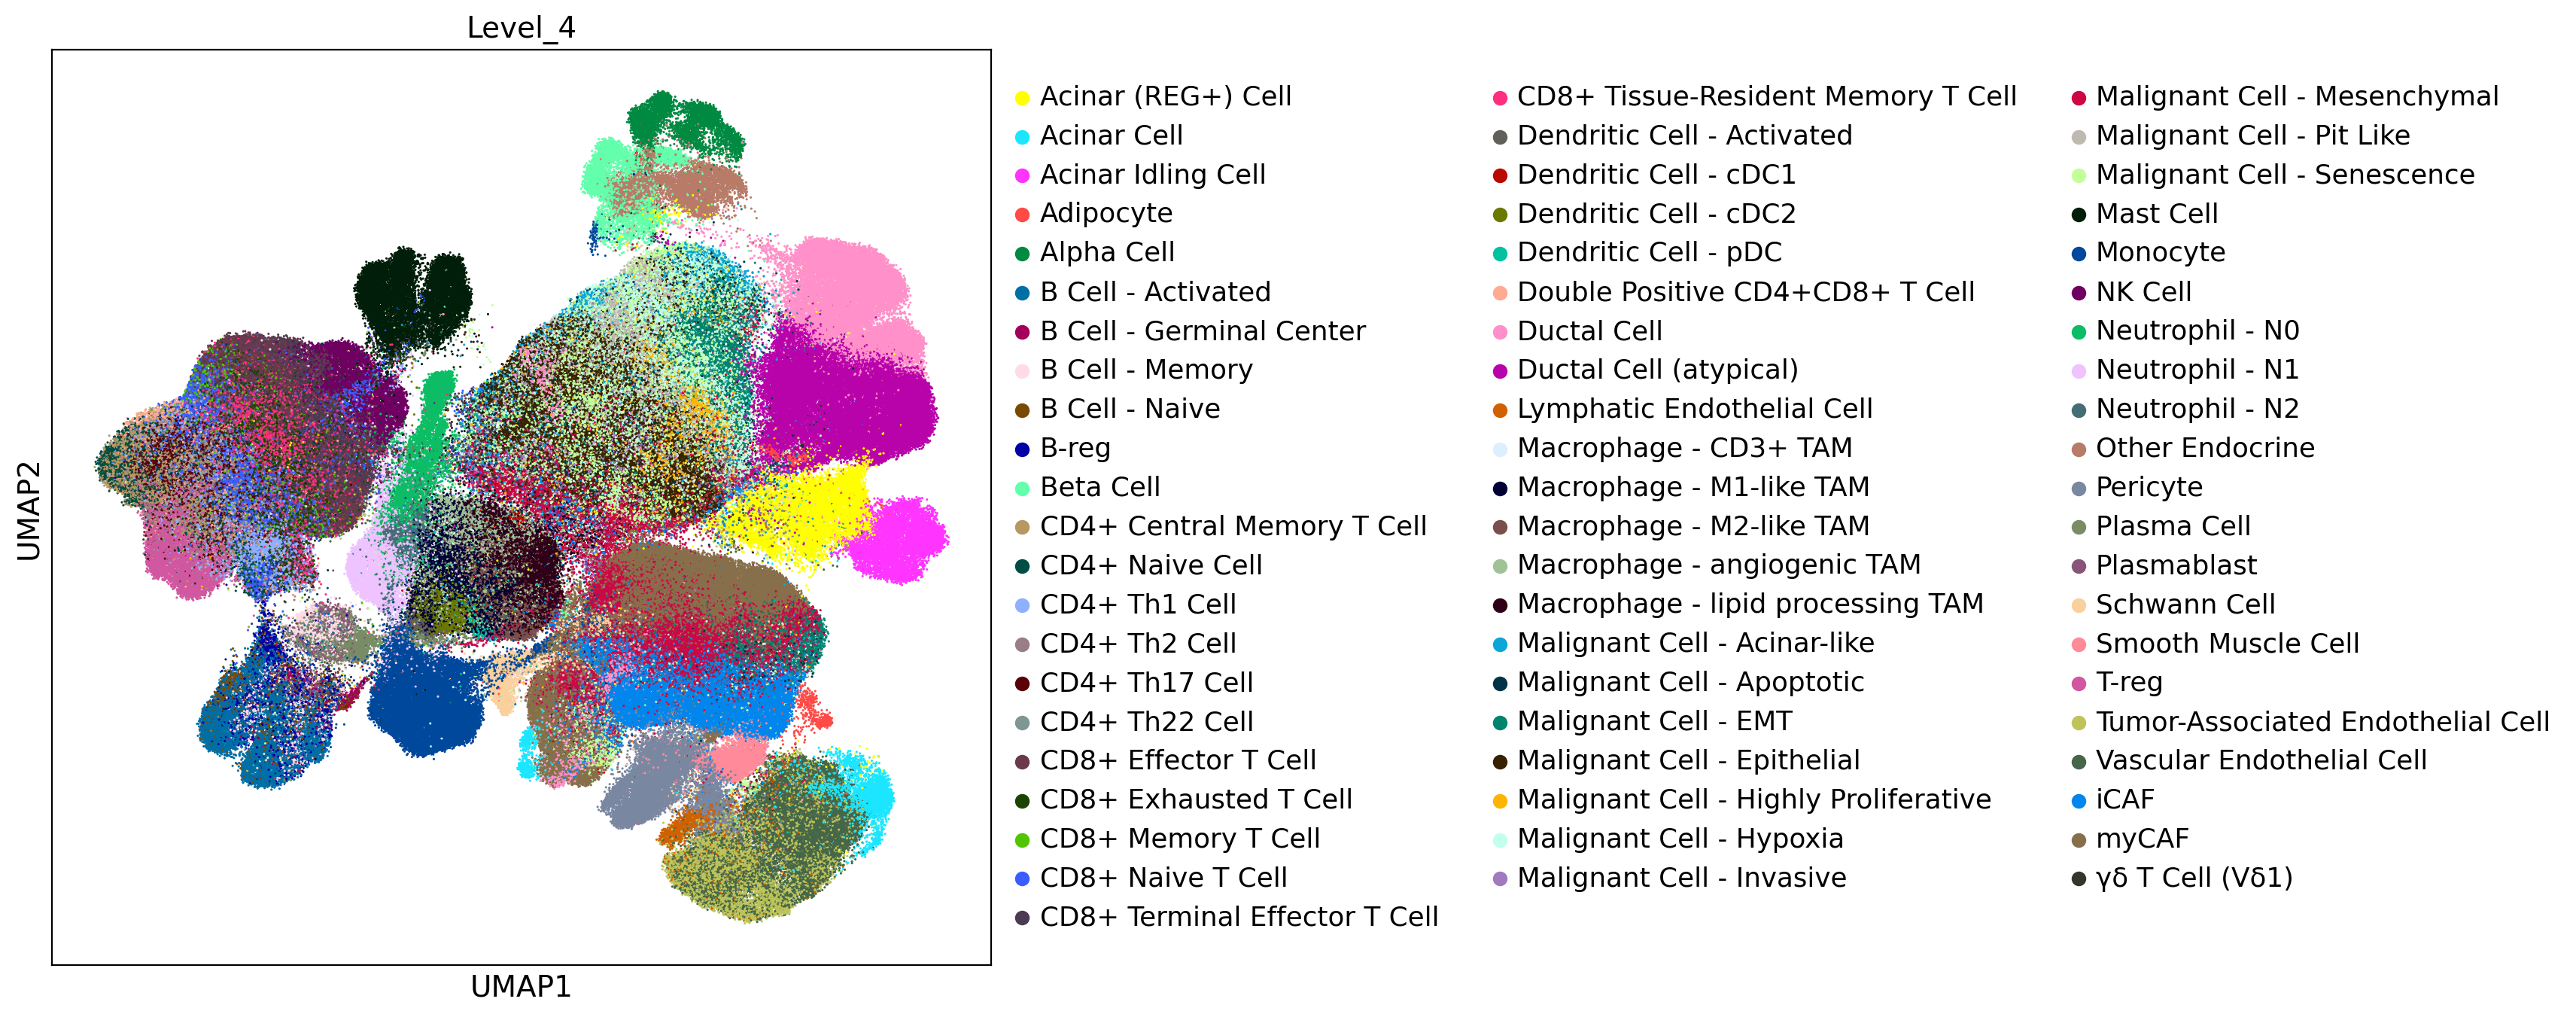

In [99]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.umap(adata, color='Level_4', size=5)

# Final Back Track

In [103]:
df_map = pd.read_csv('../PDAC_Final/Downstream/Level_4_to_Level_1.csv', index_col=None, sep=';')

In [104]:
df_map

Level_4          Level_3         Level_2          Level_1
0   CD4+ Memory T Cell      CD4+ T Cell        Lymphoid      Immune Cell
1    CD4+ Naive T Cell      CD4+ T Cell        Lymphoid      Immune Cell
2        CD4+ Th1 Cell      CD4+ T Cell        Lymphoid      Immune Cell
3        CD4+ Th2 Cell      CD4+ T Cell        Lymphoid      Immune Cell
4       CD4+ Th17 Cell      CD4+ T Cell        Lymphoid      Immune Cell
..                 ...              ...             ...              ...
64           Beta Cell        Beta Cell  Endocrine Cell  Epithelial Cell
65          Gamma Cell       Gamma Cell  Endocrine Cell  Epithelial Cell
66          Delta Cell       Delta Cell  Endocrine Cell  Epithelial Cell
67        Epsilon Cell     Epsilon Cell  Endocrine Cell  Epithelial Cell
68     Other Endocrine  Other Endocrine  Endocrine Cell  Epithelial Cell

[69 rows x 4 columns]

In [105]:
obs = adata.obs.copy()

In [106]:
obs.drop(['Level_1', 'Level_2', 'Level_3'], axis=1, inplace=True)

In [107]:
obs['Level_1'] = obs.Level_4.map(dict(zip(df_map.Level_4,df_map.Level_1)))
obs['Level_2'] = obs.Level_4.map(dict(zip(df_map.Level_4,df_map.Level_2)))
obs['Level_3'] = obs.Level_4.map(dict(zip(df_map.Level_4,df_map.Level_3)))

In [111]:
obs = obs[['Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology',
       'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito',
       'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation',
       'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5',
       'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant',
       'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status',
       'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised',
       'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment',
       'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category',
       'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75',
       'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75',
       'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75',
       'Adipocyte_leiden_0.75', 'Endocrine_Cell_leiden_0.75',
       'Acinar_Cell_leiden_0.75', 'Pericyte_leiden_0.75',
       'Smooth_Muscle_Cell_leiden_0.75', 'NK_Cell_leiden_0.75', 'Condition',
       'combo', 'EMT category', 'EMT score', 'EMT_score_DL',
       'Suspicious_Normal',  'Level_1', 'Level_2', 'Level_3', 'Level_4', '_scvi_batch', '_scvi_labels',
      ]]

In [110]:
pd.set_option('display.max_rows', None)
obs.groupby('Level_4').size()

Level_4
Acinar (REG+) Cell                       11234
Acinar Cell                               4342
Acinar Idling Cell                        7371
Adipocyte                                 1407
Alpha Cell                                4725
B Cell - Activated                       12636
B Cell - Germinal Center                  1085
B Cell - Memory                           4179
B Cell - Naive                            2724
B-reg                                     3903
Beta Cell                                 5796
CD4+ Central Memory T Cell                8388
CD4+ Naive Cell                           4664
CD4+ Th1 Cell                             4488
CD4+ Th2 Cell                             2703
CD4+ Th17 Cell                            8993
CD4+ Th22 Cell                            1733
CD8+ Effector T Cell                     20824
CD8+ Exhausted T Cell                    15051
CD8+ Memory T Cell                        4553
CD8+ Naive T Cell                        17770
CD8+ 

In [112]:
obs.head()

Barcode  \
Dataset_Barcode                                                                         
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0  AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0  AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0  AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0   

                                              Dataset      ID_batch_covariate  \
Dataset_Barcode                                                                 
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    Ding  HT056P1_Ding_scRNA-seq   

                                              Unique_ID Technology  n_genes  \
Dataset_Barcode                                                               
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2929   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     3440   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     1976   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2446   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0   HT056P1  scRNA-seq     2675   

                                               n_counts  log_counts   mt_frac  \
Dataset_Barcode                                                                 
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0   12375.0    9.423433  0.096727   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0   10981.0    9.303922  0.068573   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0    5352.0    8.585226  0.113416   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0    7301.0    8.895766  0.151760   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0    8489.0    9.046527  0.112852   

                                               n_genes_by_counts  ...  \
Dataset_Barcode                                                   ...   
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0               2929  ...   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0               3440  ...   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0               1976  ...   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0               2446  ...   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0               2675  ...   

                                               EMT category  EMT score  \
Dataset_Barcode                                                          
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           NaN        NaN   

                                               EMT_score_DL  \
Dataset_Barcode                                               
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0     -1.481311   
Ding_AAACCCACAACTCCCT-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACAGACAATA-1-HT056P-S1PAA1-0-0-0-0           NaN   
Ding_AAACCCACATGCCGAC-1-HT056P-S1PAA1-0-0-0-0           NaN   

                                               Suspicious_Normal  \
Dataset_Barcode                                                    
Ding_AAACCCAAGTCATCGT-1-HT056P-S1PAA1-0-0-0-0              Other   
Ding_AAACCCACAACCACGC-1-HT056P-S1PAA1-0-0-0-0              Other   
Ding_AAACCCACAACTCC

In [113]:
adata.obs = obs.copy()

# Save

In [114]:
adata.write('../PDAC_Final/Downstream/final_scanVI/final_object_all_genes.h5ad')

In [115]:
adata[:, adata.var.Manual_Genes]

View of AnnData object with n_obs × n_vars = 726054 × 2505
    obs: 'Barcode', 'Dataset', 'ID_batch_covariate', 'Unique_ID', 'Technology', 'n_genes', 'n_counts', 'log_counts', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'batch', 'leiden_0.2', 'leiden_0.2_annotation', 'leiden_subcluster', 'level0_leiden_subcluster', 'leiden_0.5', 'is_outlier_total_counts', 'outlier', 'infercnv_score_malignant', 'infercnv_score_malignant_refined', 'cnv_score_abs', 'treatment_status', 'Level_0', 'MALAT1_lognorm', 'empty_droplet', 'ID_harmonised', 'Dataset_unique', 'Tissue', 'Age', 'Sex', 'Diabetes', 'Treatment', 'Global_Leiden', 'Treatment_Harmonized', 'Treatment_Category', 'Myeloid_leiden_0.75', 'Fibroblast_leiden_0.75', 'Lymphoid_leiden_0.75', 'Endothelial_Cell_leiden_0.75', 'Malignant_leiden_0.75', 'Ductal_Cell_leiden_0.75', 'Schwann_Cell_leiden_0.75', 'Adipocyte_leiden_0.75

In [117]:
adata_mg = adata[:, adata.var.Manual_Genes].copy()

In [118]:
adata_mg.write('../PDAC_Final/Downstream/final_scanVI/final_object_mg.h5ad')

In [119]:
pwd

'/ictstr01/groups/ml01/workspace/shrey.parikh/PDAC_Work_Dir/Final_Code_Git'